<a href="https://colab.research.google.com/github/kiq-caique/inteligencia_artificial_UFV/blob/main/ELT_574_118535_Atividade3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nova seção

In [ ]:
#Importando as bibliotecas para análise do problema e configurando o notebook

## OS para executar comandos de diretorio
import os

## Habilitar Google Drive no Colab
# from google.colab import drive
# drive.mount('/content/drive')

## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

print('Setup completo!')

Setup completo!


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. #o ponto em 255. caracteriza a conversao para float
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

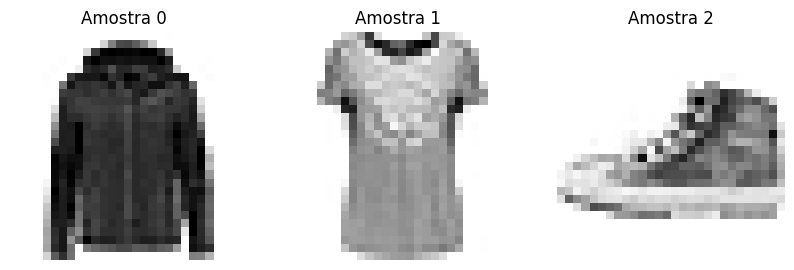

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.imshow(X_train[0], cmap="binary")
plt.title('Amostra 0')
plt.axis('off')

plt.subplot(132)
plt.imshow(X_train[1], cmap="binary")
plt.title('Amostra 1')
plt.axis('off')

plt.subplot(133)
plt.imshow(X_train[2], cmap="binary")
plt.title('Amostra 2')
plt.axis('off')
plt.show()

# Fase 2

Esse é um modelo de rede neural convolucional (CNN) para classificar imagens de 28x28 pixels com 1 canal (como o MNIST Fashion). O modelo consiste em três camadas convolucionais seguidas de camadas de pooling e normalização, e termina com camadas totalmente conectadas para classificar as imagens em 10 categorias. O modelo é compilado com o otimizador Adam e a função de perda sparse_categorical_crossentropy, e o resumo do modelo é exibido para verificar a arquitetura e os parâmetros do modelo.

In [ ]:
print(y_train)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

[4 0 7 ... 3 0 5]


In [ ]:
class_names[y_train[0]]

'Coat'

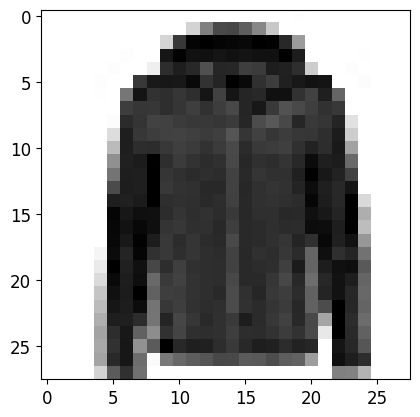

In [ ]:
plt.imshow(X_train[0], cmap="binary")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_y = pd.DataFrame(y_train)

In [ ]:
df_y.value_counts()

,count
0,
0,5543
4,5512
8,5510
5,5507
6,5507
3,5499
2,5496
9,5494
7,5488


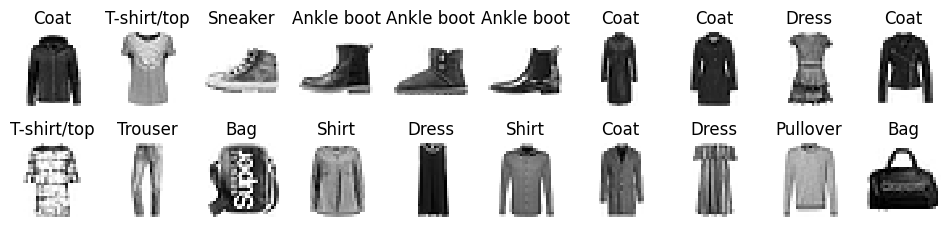

In [ ]:
n_rows = 2
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
# # Criando o modelo de PMC
# ## Declaracao do modelo sequencial para o Keras
# model = keras.models.Sequential()
# ## Camada de entrada (flatten transforma a imagem 28x28 em um vetor 1D de 784 valores)
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# ## Primeira camada escondida, com 300 neuronios e funcao de ativacao ReLU;
# ### Cada camada 'Dense' gerencia seus proprios parametros, incluindo bias
# model.add(keras.layers.Dense(500, activation="relu"))
# ## Segunda camada escondida, com 100 neuronios e ReLU
# model.add(keras.layers.Dense(200, activation="relu"))
# ## Camada de saida com 10 neuronios e funcao de ativacao softmax (multiclasse)
# model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

# Camada Convolucional 1
model.add(layers.Conv2D(16, (5, 5), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

# Camada Convolucional 2
model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

# Camada Convolucional 3
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

# Camada Totalmente Conectada
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# import tensorflow as tf
# from keras.regularizers import l2
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=[28, 28]),
#     tf.keras.layers.Dense(300, activation="relu"),
#     tf.keras.layers.Dense(200, activation="relu"),
#     tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.03)),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(10, activation="softmax")
# ])

Resumo do modelo

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 16)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 32)          │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 3, 3, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,106 (547.29 KB)

 Trainable params: 139,882 (546.41 KB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
model.layers

[<Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <BatchNormalization name=batch_normalization_3, built=True>,
 <Conv2D name=conv2d_4, built=True>,
 <MaxPooling2D name=max_pooling2d_4, built=True>,
 <BatchNormalization name=batch_normalization_4, built=True>,
 <Conv2D name=conv2d_5, built=True>,
 <MaxPooling2D name=max_pooling2d_5, built=True>,
 <BatchNormalization name=batch_normalization_5, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_3, built=True>]

In [ ]:
hidden1 = model.layers[1]
hidden1

<MaxPooling2D name=max_pooling2d_3, built=True>

In [ ]:
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# optimizer = SGD(learning_rate=0.01)
# optimizer = Adam(learning_rate=0.001)
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)



In [ ]:
history = model.fit(X_train,y_train, epochs=10,
                    validation_data=(X_valid,y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.7753 - loss: 0.6433 - val_accuracy: 0.8886 - val_loss: 0.2924
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8829 - loss: 0.3262 - val_accuracy: 0.9044 - val_loss: 0.2667
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8966 - loss: 0.2831 - val_accuracy: 0.9148 - val_loss: 0.2431
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9081 - loss: 0.2525 - val_accuracy: 0.9140 - val_loss: 0.2462
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9209 - loss: 0.2182 - val_accuracy: 0.9170 - val_loss: 0.2377
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9269 - loss: 0.2024 - val_accuracy: 0.9166 - val_loss: 0.2300
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9311 - loss: 0.1895 - val_accuracy: 0.9208 - val_loss: 0.2231
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9367 - loss: 0.170

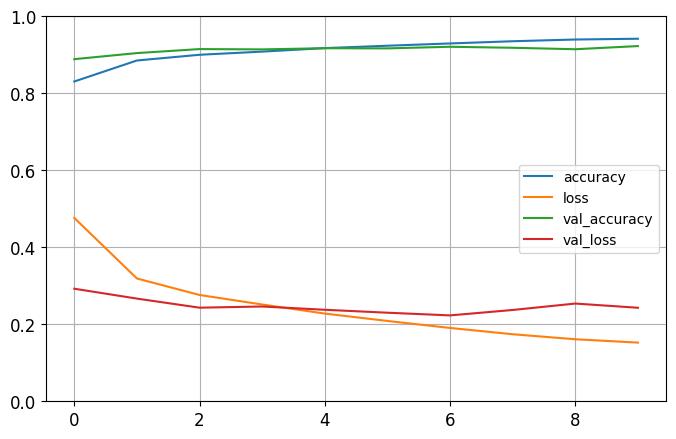

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # ajusta o eixo y para os limites de 0 a 1
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9150 - loss: 0.2847


[0.2683984935283661, 0.9140999913215637]

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, np.argmax(y_pred,axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[870,   1,  25,  10,   4,   1,  84,   0,   5,   0],
       [  2, 987,   0,   7,   1,   0,   2,   0,   1,   0],
       [ 13,   1, 883,   4,  54,   0,  44,   0,   1,   0],
       [ 13,  10,  10, 905,  40,   0,  21,   0,   1,   0],
       [  0,   2,  69,  15, 867,   0,  47,   0,   0,   0],
       [  1,   0,   0,   0,   0, 982,   0,  10,   0,   7],
       [ 98,   2,  63,  22,  82,   0, 728,   0,   5,   0],
       [  0,   0,   0,   0,   0,   8,   0, 955,   0,  37],
       [  3,   2,   2,   1,   3,   2,   0,   3, 984,   0],
       [  0,   0,   1,   0,   0,   4,   0,  15,   0, 980]])

In [ ]:
X_new = X_test
y_proba = model.predict(X_new)
y_proba.round(5)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [0.0000e+00, 0.0000e+00, 9.9995e-01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.7000e-04, 0.0000e+00, 0.0000e+00, ..., 7.3252e-01, 3.7700e-03,
        4.2300e-03]], dtype=float32)

In [ ]:
for i in y_proba:
  print(i.round(3))

A saída de streaming foi truncada nas últimas 5000 linhas.
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0.002 0.    0.    0.    0.    0.    0.998 0.    0.    0.   ]
[0.    0.    0.001 0.    0.999 0.    0.    0.    0.    0.   ]
[0.    0.    0.    0.    0.665 0.    0.335 0.    0.    0.   ]
[0.    0.003 0.    0.997 0.    0.    0.    0.    0.    0.   ]
[0.004 0.    0.002 0.993 0.    0.    0.001 0.    0.    0.   ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.    0.    0.003 0.    0.997 0.    0.    0.    0.    0.   ]
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.999]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0.    0.522 0.    0.039 0.128 0.    0.003 0.    0.29  0.017]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0.227 0.    0.048 0.031 0.002 0.    0.691 0.    0.    0.   ]
[0.    0.    0.855 0.    0.145 0.    0.    0.    0.    0.   ]
[0.971 0.    0.    0.    0.    0.    0.029 0.    0.    0.   ]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0.

In [ ]:
list(y_test[:3])

[9, 2, 1]

In [ ]:
y_pred = np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 7])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sneaker'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

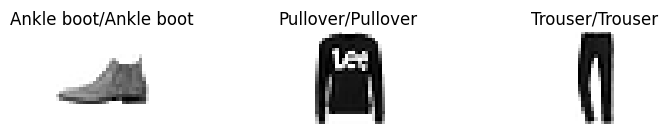

In [ ]:
n_rows = 1
n_cols = 3
plt.figure(figsize=(n_cols * 3, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index]] + '/' + class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()